In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
pd.set_option('display.float_format', '{:.2f}'.format)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('NSE_BANKING_SECTOR.csv')
df.head(5)

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,2016-01-01,HDFC,EQ,1263.75,1261.00,1266.90,1250.65,1257.80,1258.45,1258.39,676161,85087506875000.00,13230,308262,0.46
1,2016-01-04,HDFC,EQ,1258.45,1250.00,1253.90,1212.05,1217.15,1216.70,1227.55,1995329,244937056355000.03,78529,1360507,0.68
2,2016-01-05,HDFC,EQ,1216.70,1229.90,1233.45,1206.50,1208.15,1209.40,1219.50,2325929,283646403125000.00,109820,1644980,0.71
3,2016-01-06,HDFC,EQ,1209.40,1209.60,1220.75,1202.40,1207.55,1209.30,1210.81,2746330,332528632100000.00,96546,2001431,0.73
4,2016-01-07,HDFC,EQ,1209.30,1198.85,1203.55,1175.00,1176.35,1179.45,1186.35,1780298,211205540675000.00,60151,1172564,0.66


In [3]:
df.shape

(41231, 15)

In [4]:
df.isna().sum()

DATE                  0
SYMBOL                0
SERIES                0
PREV CLOSE            0
OPEN                  0
HIGH                  0
LOW                   0
LAST                  0
CLOSE                 0
VWAP                  0
VOLUME                0
TURNOVER              0
TRADES                0
DELIVERABLE VOLUME    0
%DELIVERBLE           0
dtype: int64

In [5]:
df.DATE.max(), df.DATE.min()

('2021-05-28', '2016-01-01')

In [6]:
df.SERIES.nunique()

1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41231 entries, 0 to 41230
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                41231 non-null  object 
 1   SYMBOL              41231 non-null  object 
 2   SERIES              41231 non-null  object 
 3   PREV CLOSE          41231 non-null  float64
 4   OPEN                41231 non-null  float64
 5   HIGH                41231 non-null  float64
 6   LOW                 41231 non-null  float64
 7   LAST                41231 non-null  float64
 8   CLOSE               41231 non-null  float64
 9   VWAP                41231 non-null  float64
 10  VOLUME              41231 non-null  int64  
 11  TURNOVER            41231 non-null  float64
 12  TRADES              41231 non-null  int64  
 13  DELIVERABLE VOLUME  41231 non-null  int64  
 14  %DELIVERBLE         41231 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 4.7+

In [8]:
df['DATE'] = pd.to_datetime(df.DATE)
df = df.sort_values(by=['DATE','SYMBOL']).reset_index()
df = df.drop('index', axis=1)
df

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,2016-01-01,AXISBANK,EQ,449.10,449.75,452.90,445.55,449.70,449.90,449.76,3345654,150473265095000.00,37626,1549760,0.46
1,2016-01-01,BANKBARODA,EQ,156.65,157.20,159.90,156.00,158.75,159.05,157.97,2465469,38946877070000.00,14807,522606,0.21
2,2016-01-01,BANKINDIA,EQ,114.95,114.90,117.75,114.60,117.45,117.35,116.39,1729723,20132112545000.00,11172,408793,0.24
3,2016-01-01,CANBK,EQ,232.95,232.90,239.60,232.40,238.70,238.30,236.86,1549290,36696860690000.00,13562,354121,0.23
4,2016-01-01,CENTRALBK,EQ,71.10,71.40,71.95,70.65,71.90,71.80,71.48,165871,1185623715000.00,800,83549,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-28,SURYODAY,EQ,237.25,234.80,234.80,225.00,225.10,225.15,227.58,294858,6710387285000.00,9755,179980,0.61
41227,2021-05-28,UCOBANK,EQ,13.15,13.65,14.05,13.45,13.50,13.55,13.68,43581102,59615116415000.00,41450,15214003,0.35
41228,2021-05-28,UJJIVANSFB,EQ,29.95,30.10,30.40,29.90,30.00,29.95,30.08,2104653,6331720920000.00,6812,1113577,0.53
41229,2021-05-28,UNIONBANK,EQ,33.95,34.50,34.90,34.15,34.40,34.35,34.41,28013917,96404493675000.00,35571,11127904,0.40


In [9]:
## Transform turnover to Millions

df['TURNOVER'] = (df['TURNOVER'] / 1e6).round()
df = df.rename(columns={'TURNOVER':'TURNOVER_IN_MILLIONS'})
df

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER_IN_MILLIONS,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,2016-01-01,AXISBANK,EQ,449.10,449.75,452.90,445.55,449.70,449.90,449.76,3345654,150473265.00,37626,1549760,0.46
1,2016-01-01,BANKBARODA,EQ,156.65,157.20,159.90,156.00,158.75,159.05,157.97,2465469,38946877.00,14807,522606,0.21
2,2016-01-01,BANKINDIA,EQ,114.95,114.90,117.75,114.60,117.45,117.35,116.39,1729723,20132113.00,11172,408793,0.24
3,2016-01-01,CANBK,EQ,232.95,232.90,239.60,232.40,238.70,238.30,236.86,1549290,36696861.00,13562,354121,0.23
4,2016-01-01,CENTRALBK,EQ,71.10,71.40,71.95,70.65,71.90,71.80,71.48,165871,1185624.00,800,83549,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-28,SURYODAY,EQ,237.25,234.80,234.80,225.00,225.10,225.15,227.58,294858,6710387.00,9755,179980,0.61
41227,2021-05-28,UCOBANK,EQ,13.15,13.65,14.05,13.45,13.50,13.55,13.68,43581102,59615116.00,41450,15214003,0.35
41228,2021-05-28,UJJIVANSFB,EQ,29.95,30.10,30.40,29.90,30.00,29.95,30.08,2104653,6331721.00,6812,1113577,0.53
41229,2021-05-28,UNIONBANK,EQ,33.95,34.50,34.90,34.15,34.40,34.35,34.41,28013917,96404494.00,35571,11127904,0.40


In [10]:
df.SYMBOL.nunique()

36

C:\Users\Michelle.Gitau\AppData\Local\Temp\ipykernel_5780\275298826.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

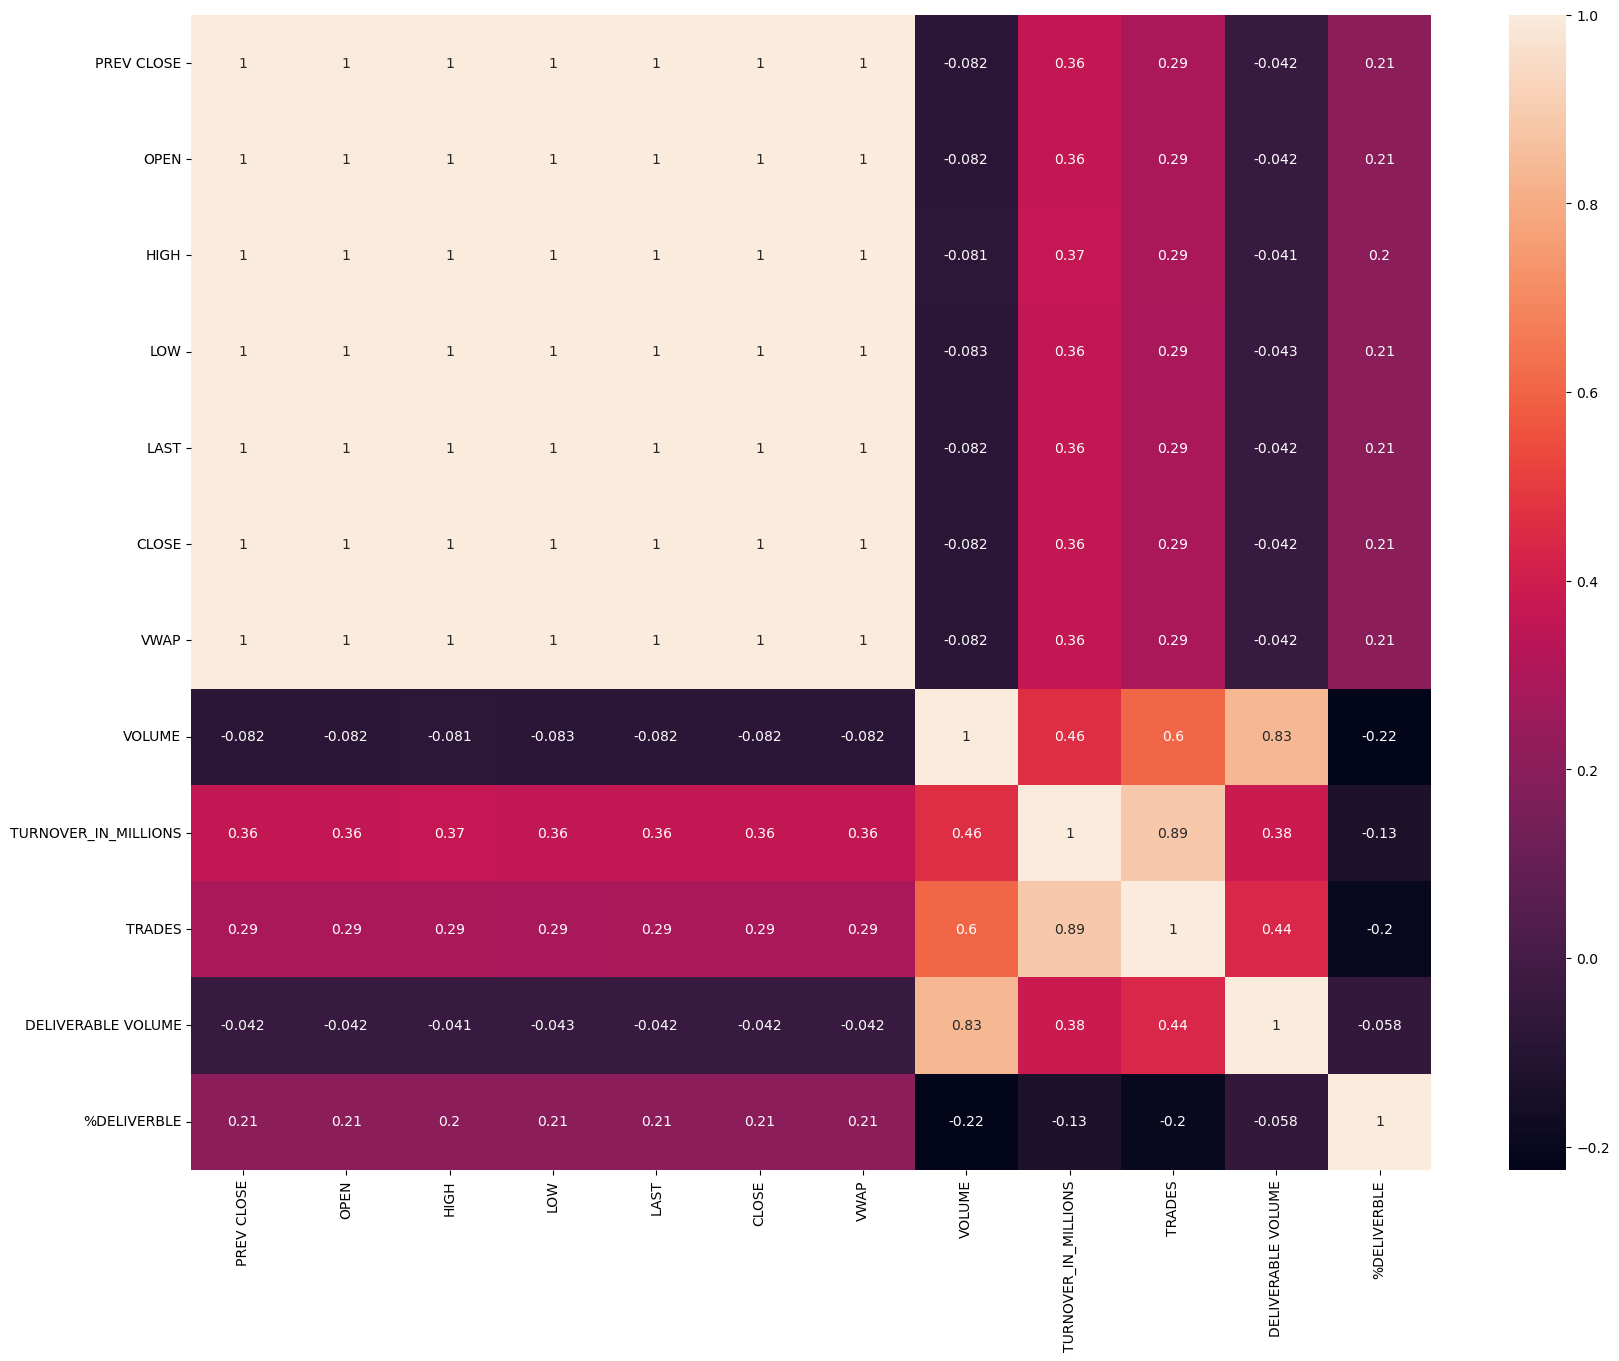

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

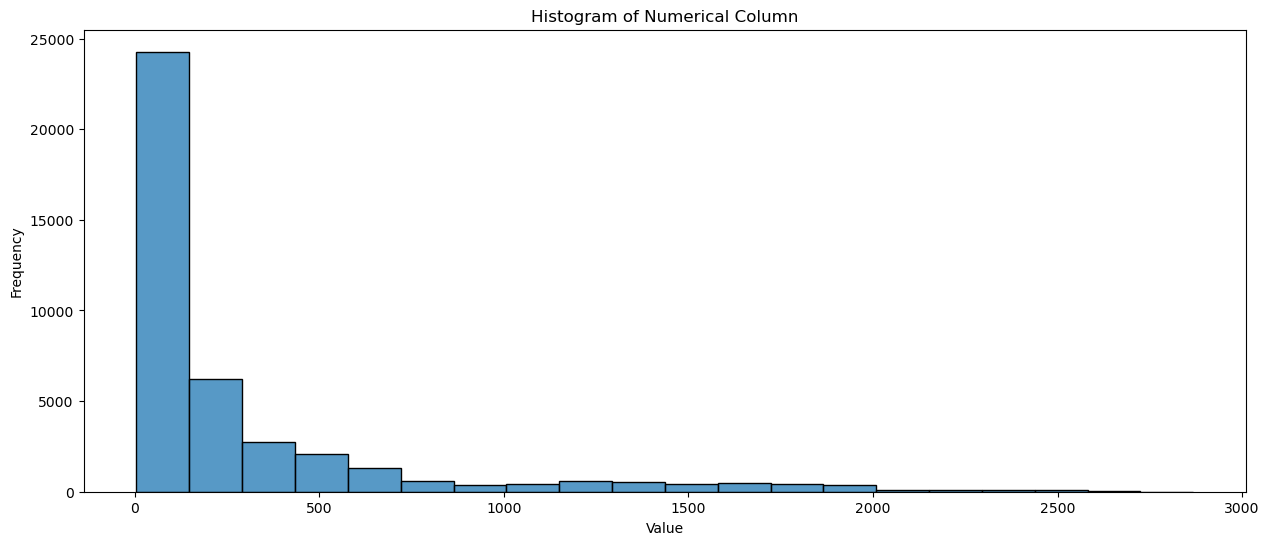

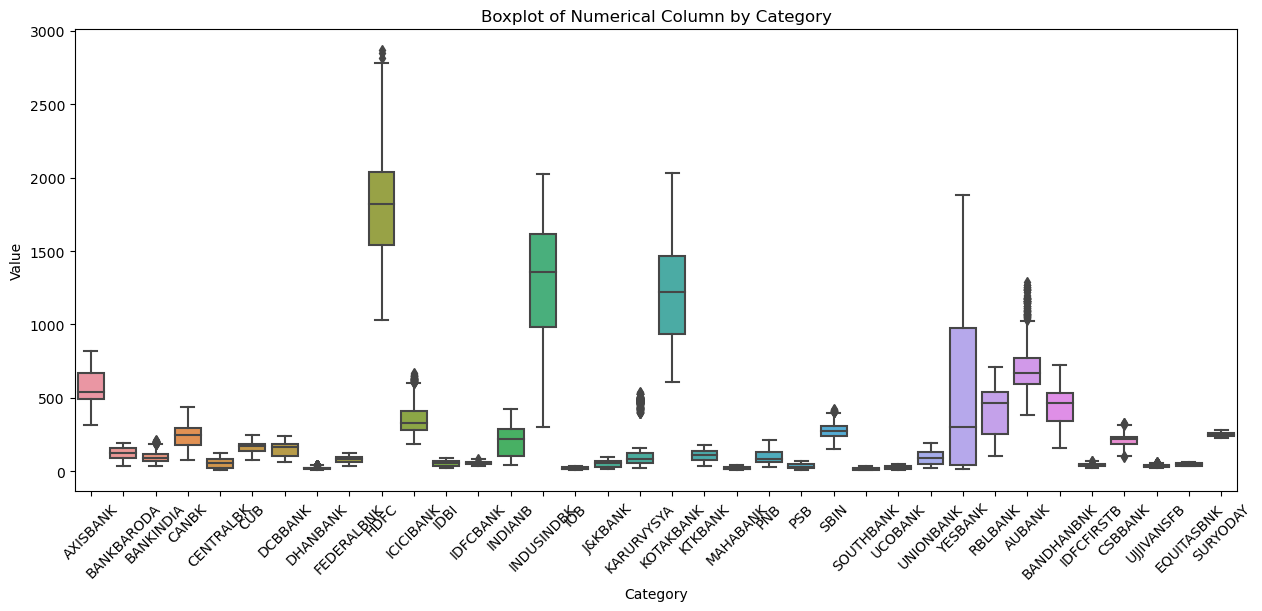

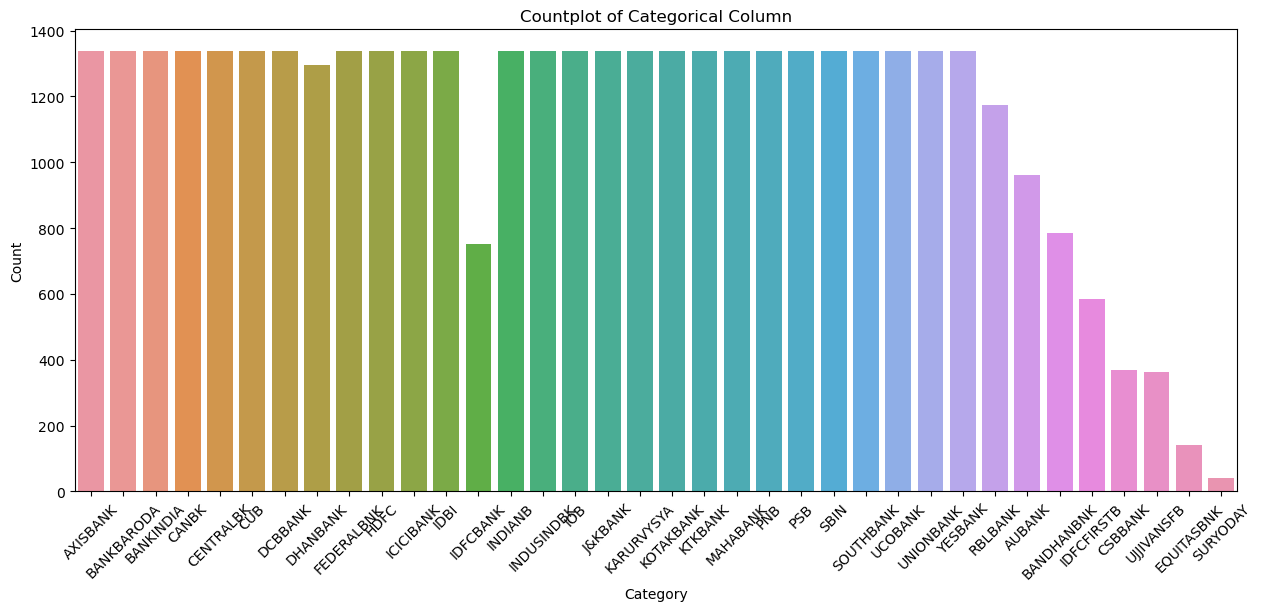

In [12]:

# Example: Create a histogram of a numerical column
plt.figure(figsize = (15,6))
sns.histplot(df['VWAP'], bins=20)
plt.title('Histogram of Numerical Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Example: Create a boxplot of a numerical column

plt.figure(figsize = (15,6))
sns.boxplot(x='SYMBOL', y='VWAP', data=df)
plt.title('Boxplot of Numerical Column by Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


# Example: Create a countplot for a categorical column
plt.figure(figsize = (15,6))
sns.countplot(x='SYMBOL', data=df)
plt.title('Countplot of Categorical Column')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


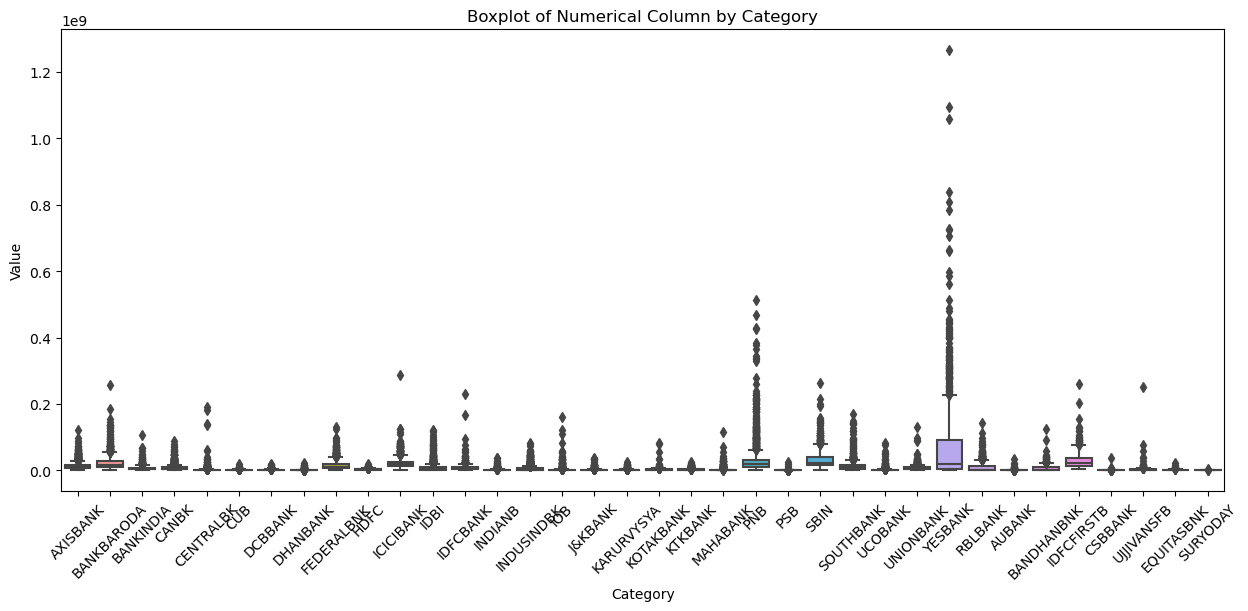

In [13]:
plt.figure(figsize = (15,6))
sns.boxplot(x='SYMBOL', y='VOLUME', data=df)
plt.title('Boxplot of Numerical Column by Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

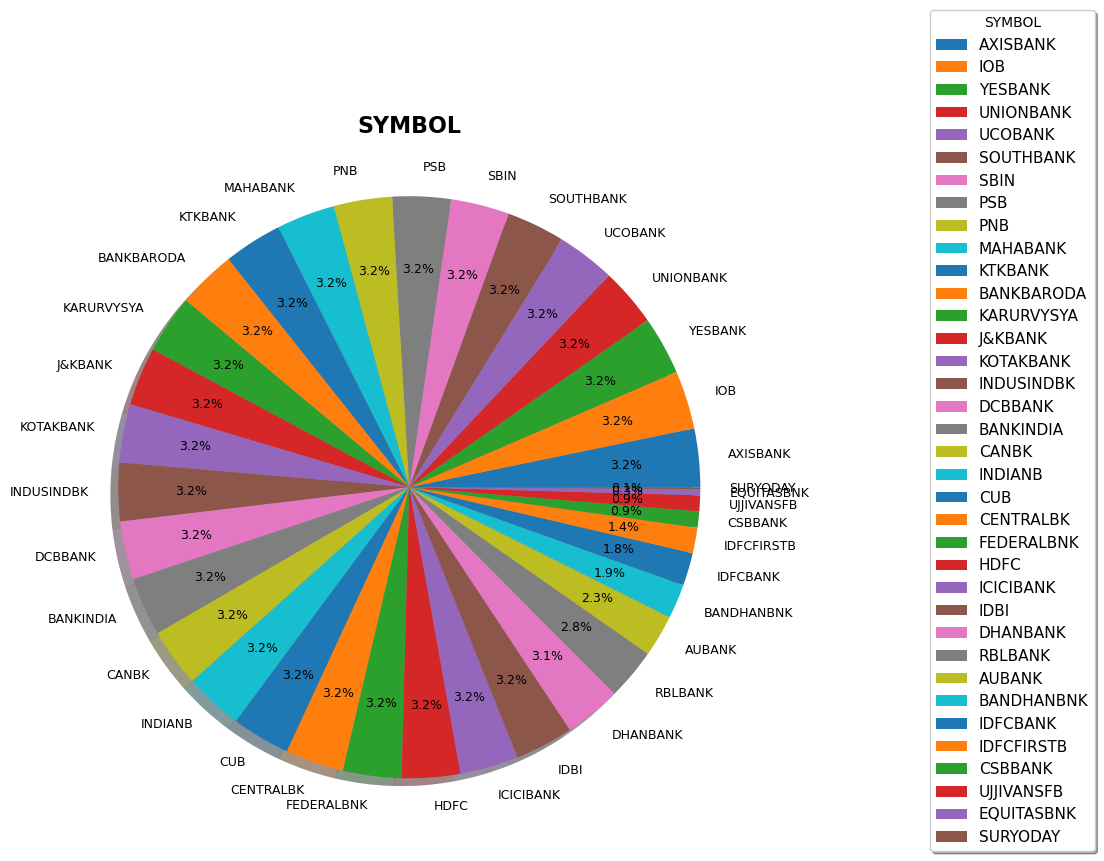

In [14]:
# SYMBOL distribution
pie_ax=df['SYMBOL'].value_counts(normalize=True).plot.pie(figsize=(9,9),legend=True,
                                                          shadow=True, autopct='%1.1f%%',
                                                          pctdistance=0.75, radius=1.05,
                                                          wedgeprops = {'linewidth': 0.1},
                                                          textprops = {'fontsize': 9})

pie_ax.set_title('SYMBOL', fontsize=16, weight='bold')
pie_ax.legend(fancybox=True, shadow=True, title='SYMBOL', fontsize=11,loc='upper right', bbox_to_anchor=(1.5, 1.2))
pie_ax.set_ylabel("")
plt.show()

In [15]:
num_df = df.select_dtypes(include='number')
num_df

,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER_IN_MILLIONS,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,449.10,449.75,452.90,445.55,449.70,449.90,449.76,3345654,150473265.00,37626,1549760,0.46
1,156.65,157.20,159.90,156.00,158.75,159.05,157.97,2465469,38946877.00,14807,522606,0.21
2,114.95,114.90,117.75,114.60,117.45,117.35,116.39,1729723,20132113.00,11172,408793,0.24
3,232.95,232.90,239.60,232.40,238.70,238.30,236.86,1549290,36696861.00,13562,354121,0.23
4,71.10,71.40,71.95,70.65,71.90,71.80,71.48,165871,1185624.00,800,83549,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...
41226,237.25,234.80,234.80,225.00,225.10,225.15,227.58,294858,6710387.00,9755,179980,0.61
41227,13.15,13.65,14.05,13.45,13.50,13.55,13.68,43581102,59615116.00,41450,15214003,0.35
41228,29.95,30.10,30.40,29.90,30.00,29.95,30.08,2104653,6331721.00,6812,1113577,0.53
41229,33.95,34.50,34.90,34.15,34.40,34.35,34.41,28013917,96404494.00,35571,11127904,0.40


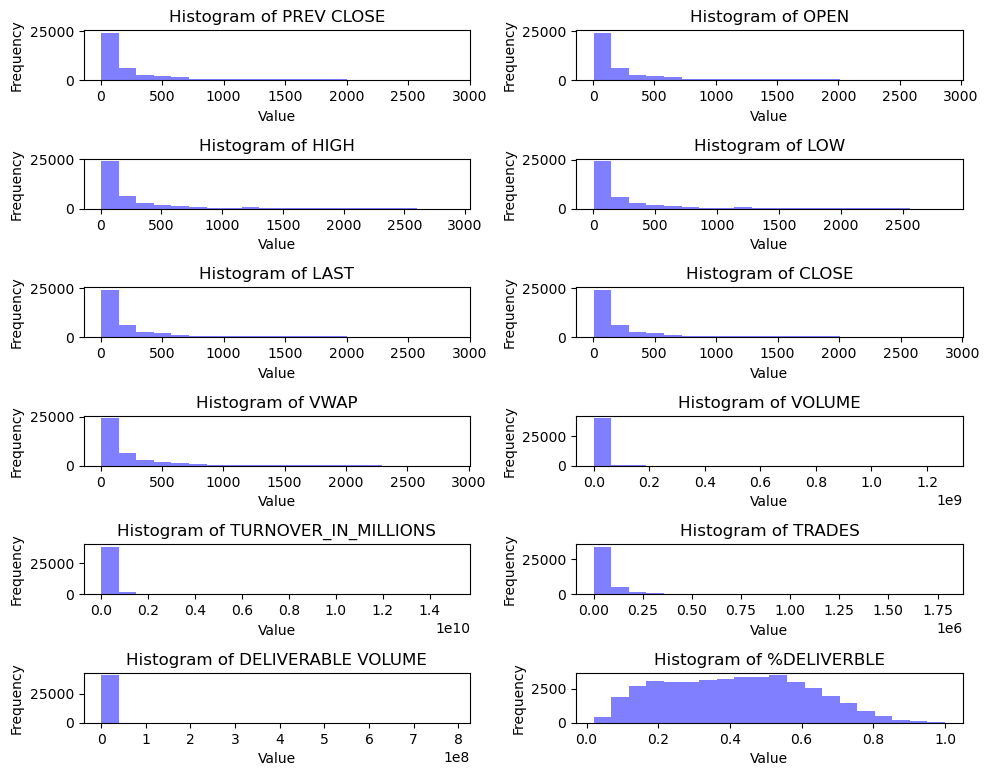

In [16]:
# Calculate the number of rows and columns needed for the subplots
n_cols = 2
n_rows = (len(df.columns) + n_cols - 1) // n_cols


# Create subplots for multiple histograms
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 10))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over column names and create histogram plots
for i, column in enumerate(num_df.columns):
    axes[i].hist(num_df[column], bins=20, color='blue', alpha=0.5)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    


# Hide any unused subplots
for j in range(len(num_df.columns), n_cols * n_rows):
    fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Text(0.5, 0, 'Categories')

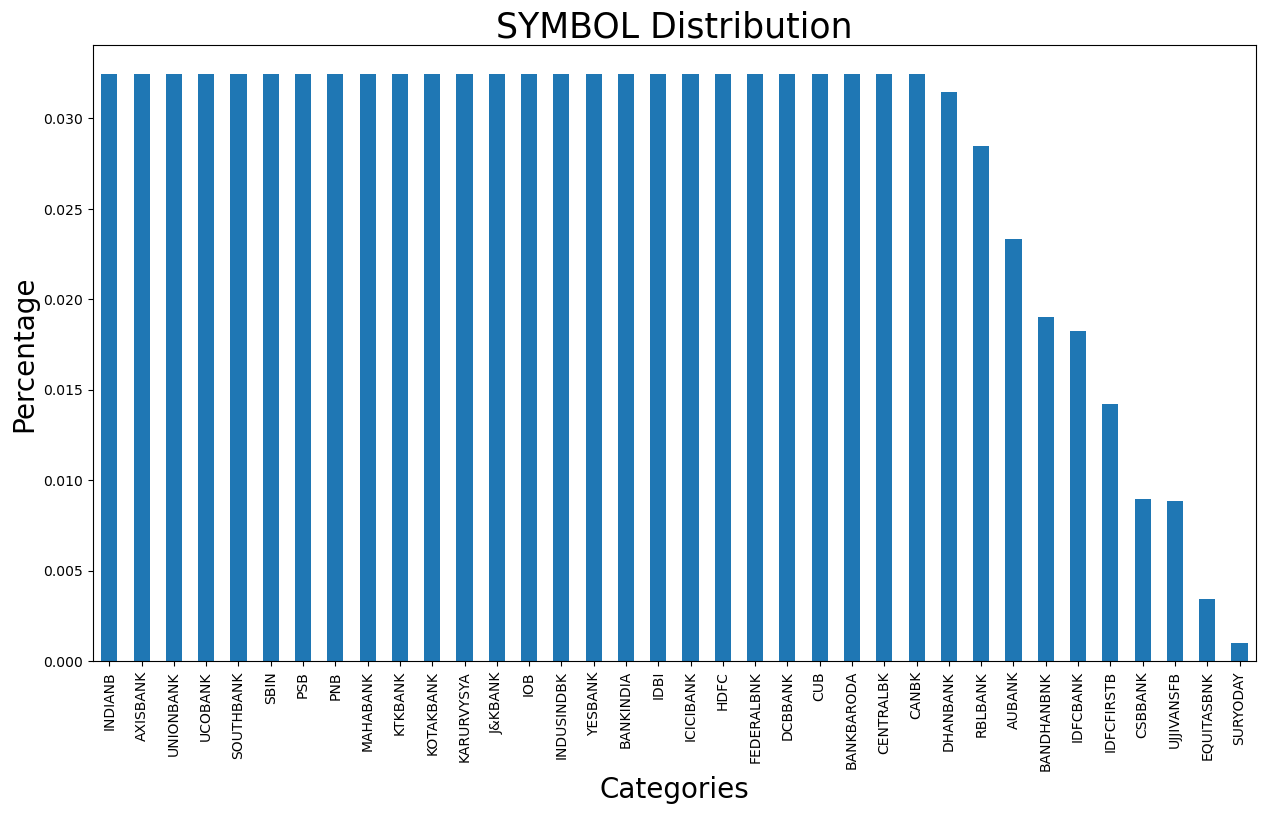

In [17]:
df['SYMBOL'] = df['SYMBOL'].astype('category')
df['SYMBOL'].value_counts(normalize=True).plot(kind='bar', figsize = (15,8))
plt.title("SYMBOL Distribution", fontsize=25)
plt.ylabel("Percentage", fontsize=20)
plt.xlabel("Categories", fontsize=20)


In [18]:
## move target column to end of df

first_column = df.pop('VWAP')  

# Add the first column as the last column
df['VWAP'] = first_column

df


,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VOLUME,TURNOVER_IN_MILLIONS,TRADES,DELIVERABLE VOLUME,%DELIVERBLE,VWAP
0,2016-01-01,AXISBANK,EQ,449.10,449.75,452.90,445.55,449.70,449.90,3345654,150473265.00,37626,1549760,0.46,449.76
1,2016-01-01,BANKBARODA,EQ,156.65,157.20,159.90,156.00,158.75,159.05,2465469,38946877.00,14807,522606,0.21,157.97
2,2016-01-01,BANKINDIA,EQ,114.95,114.90,117.75,114.60,117.45,117.35,1729723,20132113.00,11172,408793,0.24,116.39
3,2016-01-01,CANBK,EQ,232.95,232.90,239.60,232.40,238.70,238.30,1549290,36696861.00,13562,354121,0.23,236.86
4,2016-01-01,CENTRALBK,EQ,71.10,71.40,71.95,70.65,71.90,71.80,165871,1185624.00,800,83549,0.50,71.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-28,SURYODAY,EQ,237.25,234.80,234.80,225.00,225.10,225.15,294858,6710387.00,9755,179980,0.61,227.58
41227,2021-05-28,UCOBANK,EQ,13.15,13.65,14.05,13.45,13.50,13.55,43581102,59615116.00,41450,15214003,0.35,13.68
41228,2021-05-28,UJJIVANSFB,EQ,29.95,30.10,30.40,29.90,30.00,29.95,2104653,6331721.00,6812,1113577,0.53,30.08
41229,2021-05-28,UNIONBANK,EQ,33.95,34.50,34.90,34.15,34.40,34.35,28013917,96404494.00,35571,11127904,0.40,34.41


## FEATURE ENGINEERING

In [19]:
## Date age features

from datetime import datetime

current_date = datetime.now()

df['DATE_AGE'] = current_date.year - df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['YEAR'] = df['DATE'].dt.year
df['DAY'] = df['DATE'].dt.day
df

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VOLUME,TURNOVER_IN_MILLIONS,TRADES,DELIVERABLE VOLUME,%DELIVERBLE,VWAP,DATE_AGE,MONTH,YEAR,DAY
0,2016-01-01,AXISBANK,EQ,449.10,449.75,452.90,445.55,449.70,449.90,3345654,150473265.00,37626,1549760,0.46,449.76,7,1,2016,1
1,2016-01-01,BANKBARODA,EQ,156.65,157.20,159.90,156.00,158.75,159.05,2465469,38946877.00,14807,522606,0.21,157.97,7,1,2016,1
2,2016-01-01,BANKINDIA,EQ,114.95,114.90,117.75,114.60,117.45,117.35,1729723,20132113.00,11172,408793,0.24,116.39,7,1,2016,1
3,2016-01-01,CANBK,EQ,232.95,232.90,239.60,232.40,238.70,238.30,1549290,36696861.00,13562,354121,0.23,236.86,7,1,2016,1
4,2016-01-01,CENTRALBK,EQ,71.10,71.40,71.95,70.65,71.90,71.80,165871,1185624.00,800,83549,0.50,71.48,7,1,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-28,SURYODAY,EQ,237.25,234.80,234.80,225.00,225.10,225.15,294858,6710387.00,9755,179980,0.61,227.58,2,5,2021,28
41227,2021-05-28,UCOBANK,EQ,13.15,13.65,14.05,13.45,13.50,13.55,43581102,59615116.00,41450,15214003,0.35,13.68,2,5,2021,28
41228,2021-05-28,UJJIVANSFB,EQ,29.95,30.10,30.40,29.90,30.00,29.95,2104653,6331721.00,6812,1113577,0.53,30.08,2,5,2021,28
41229,2021-05-28,UNIONBANK,EQ,33.95,34.50,34.90,34.15,34.40,34.35,28013917,96404494.00,35571,11127904,0.40,34.41,2,5,2021,28


In [20]:
df ['MARKET_CONSIDERATION_MNS'] = (df.VWAP * df['DELIVERABLE VOLUME'])
df

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VOLUME,TURNOVER_IN_MILLIONS,TRADES,DELIVERABLE VOLUME,%DELIVERBLE,VWAP,DATE_AGE,MONTH,YEAR,DAY,MARKET_CONSIDERATION_MNS
0,2016-01-01,AXISBANK,EQ,449.10,449.75,452.90,445.55,449.70,449.90,3345654,150473265.00,37626,1549760,0.46,449.76,7,1,2016,1,697020057.60
1,2016-01-01,BANKBARODA,EQ,156.65,157.20,159.90,156.00,158.75,159.05,2465469,38946877.00,14807,522606,0.21,157.97,7,1,2016,1,82556069.82
2,2016-01-01,BANKINDIA,EQ,114.95,114.90,117.75,114.60,117.45,117.35,1729723,20132113.00,11172,408793,0.24,116.39,7,1,2016,1,47579417.27
3,2016-01-01,CANBK,EQ,232.95,232.90,239.60,232.40,238.70,238.30,1549290,36696861.00,13562,354121,0.23,236.86,7,1,2016,1,83877100.06
4,2016-01-01,CENTRALBK,EQ,71.10,71.40,71.95,70.65,71.90,71.80,165871,1185624.00,800,83549,0.50,71.48,7,1,2016,1,5972082.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-28,SURYODAY,EQ,237.25,234.80,234.80,225.00,225.10,225.15,294858,6710387.00,9755,179980,0.61,227.58,2,5,2021,28,40959848.40
41227,2021-05-28,UCOBANK,EQ,13.15,13.65,14.05,13.45,13.50,13.55,43581102,59615116.00,41450,15214003,0.35,13.68,2,5,2021,28,208127561.04
41228,2021-05-28,UJJIVANSFB,EQ,29.95,30.10,30.40,29.90,30.00,29.95,2104653,6331721.00,6812,1113577,0.53,30.08,2,5,2021,28,33496396.16
41229,2021-05-28,UNIONBANK,EQ,33.95,34.50,34.90,34.15,34.40,34.35,28013917,96404494.00,35571,11127904,0.40,34.41,2,5,2021,28,382911176.64


In [21]:
##Average ticket size

df['AVERAGE_TICKET'] = df.VOLUME/df.TRADES

In [22]:
df.VOLUME.max(), df.VOLUME.min()

(1264917719, 9194)

In [23]:
# Define the window size for the moving average
window_size = 3  # You can change this to your desired window size

# Calculate the simple moving average (SMA) for each group (i.e., each stock)
df['VOLUME_SIMPLE_MOVING_AVERAGE'] = df.groupby('SYMBOL')['VOLUME'].rolling(window=window_size, min_periods=1).mean().reset_index(level=0, drop=True)

df

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VOLUME,TURNOVER_IN_MILLIONS,TRADES,DELIVERABLE VOLUME,%DELIVERBLE,VWAP,DATE_AGE,MONTH,YEAR,DAY,MARKET_CONSIDERATION_MNS,AVERAGE_TICKET,VOLUME_SIMPLE_MOVING_AVERAGE
0,2016-01-01,AXISBANK,EQ,449.10,449.75,452.90,445.55,449.70,449.90,3345654,150473265.00,37626,1549760,0.46,449.76,7,1,2016,1,697020057.60,88.92,3345654.00
1,2016-01-01,BANKBARODA,EQ,156.65,157.20,159.90,156.00,158.75,159.05,2465469,38946877.00,14807,522606,0.21,157.97,7,1,2016,1,82556069.82,166.51,2465469.00
2,2016-01-01,BANKINDIA,EQ,114.95,114.90,117.75,114.60,117.45,117.35,1729723,20132113.00,11172,408793,0.24,116.39,7,1,2016,1,47579417.27,154.83,1729723.00
3,2016-01-01,CANBK,EQ,232.95,232.90,239.60,232.40,238.70,238.30,1549290,36696861.00,13562,354121,0.23,236.86,7,1,2016,1,83877100.06,114.24,1549290.00
4,2016-01-01,CENTRALBK,EQ,71.10,71.40,71.95,70.65,71.90,71.80,165871,1185624.00,800,83549,0.50,71.48,7,1,2016,1,5972082.52,207.34,165871.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-28,SURYODAY,EQ,237.25,234.80,234.80,225.00,225.10,225.15,294858,6710387.00,9755,179980,0.61,227.58,2,5,2021,28,40959848.40,30.23,163246.67
41227,2021-05-28,UCOBANK,EQ,13.15,13.65,14.05,13.45,13.50,13.55,43581102,59615116.00,41450,15214003,0.35,13.68,2,5,2021,28,208127561.04,1051.41,25094035.67
41228,2021-05-28,UJJIVANSFB,EQ,29.95,30.10,30.40,29.90,30.00,29.95,2104653,6331721.00,6812,1113577,0.53,30.08,2,5,2021,28,33496396.16,308.96,2126244.33
41229,2021-05-28,UNIONBANK,EQ,33.95,34.50,34.90,34.15,34.40,34.35,28013917,96404494.00,35571,11127904,0.40,34.41,2,5,2021,28,382911176.64,787.55,40658680.67


In [24]:
window_size = 3

df['EXPONENTIAL_MOVING_AVERAGE_VOLUME'] = df.groupby('SYMBOL')['VOLUME'].ewm(span=window_size, adjust=False).mean().reset_index(level=0, drop=True)

df

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VOLUME,TURNOVER_IN_MILLIONS,TRADES,DELIVERABLE VOLUME,%DELIVERBLE,VWAP,DATE_AGE,MONTH,YEAR,DAY,MARKET_CONSIDERATION_MNS,AVERAGE_TICKET,VOLUME_SIMPLE_MOVING_AVERAGE,EXPONENTIAL_MOVING_AVERAGE_VOLUME
0,2016-01-01,AXISBANK,EQ,449.10,449.75,452.90,445.55,449.70,449.90,3345654,150473265.00,37626,1549760,0.46,449.76,7,1,2016,1,697020057.60,88.92,3345654.00,3345654.00
1,2016-01-01,BANKBARODA,EQ,156.65,157.20,159.90,156.00,158.75,159.05,2465469,38946877.00,14807,522606,0.21,157.97,7,1,2016,1,82556069.82,166.51,2465469.00,2465469.00
2,2016-01-01,BANKINDIA,EQ,114.95,114.90,117.75,114.60,117.45,117.35,1729723,20132113.00,11172,408793,0.24,116.39,7,1,2016,1,47579417.27,154.83,1729723.00,1729723.00
3,2016-01-01,CANBK,EQ,232.95,232.90,239.60,232.40,238.70,238.30,1549290,36696861.00,13562,354121,0.23,236.86,7,1,2016,1,83877100.06,114.24,1549290.00,1549290.00
4,2016-01-01,CENTRALBK,EQ,71.10,71.40,71.95,70.65,71.90,71.80,165871,1185624.00,800,83549,0.50,71.48,7,1,2016,1,5972082.52,207.34,165871.00,165871.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-28,SURYODAY,EQ,237.25,234.80,234.80,225.00,225.10,225.15,294858,6710387.00,9755,179980,0.61,227.58,2,5,2021,28,40959848.40,30.23,163246.67,191645.77
41227,2021-05-28,UCOBANK,EQ,13.15,13.65,14.05,13.45,13.50,13.55,43581102,59615116.00,41450,15214003,0.35,13.68,2,5,2021,28,208127561.04,1051.41,25094035.67,29204500.62
41228,2021-05-28,UJJIVANSFB,EQ,29.95,30.10,30.40,29.90,30.00,29.95,2104653,6331721.00,6812,1113577,0.53,30.08,2,5,2021,28,33496396.16,308.96,2126244.33,2070682.51
41229,2021-05-28,UNIONBANK,EQ,33.95,34.50,34.90,34.15,34.40,34.35,28013917,96404494.00,35571,11127904,0.40,34.41,2,5,2021,28,382911176.64,787.55,40658680.67,38422838.87


In [25]:
# Specify the window size for moving averages
window_size = 3

# Calculate Simple Moving Average (SMA)
df['SIMPLE_MOVING_AVERAGE_%DELIVERBLE'] = df.groupby('SYMBOL')['%DELIVERBLE'].rolling(window=window_size, min_periods=1).mean().reset_index(level=0, drop=True)

# Calculate Exponential Moving Average (EMA)
df['EXPONENTIAL_MOVING_AVERAGE_%DELIVERBLE'] = df.groupby('SYMBOL')['%DELIVERBLE'].ewm(span=window_size, adjust=False).mean().reset_index(level=0, drop=True)

df

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VOLUME,TURNOVER_IN_MILLIONS,TRADES,DELIVERABLE VOLUME,%DELIVERBLE,VWAP,DATE_AGE,MONTH,YEAR,DAY,MARKET_CONSIDERATION_MNS,AVERAGE_TICKET,VOLUME_SIMPLE_MOVING_AVERAGE,EXPONENTIAL_MOVING_AVERAGE_VOLUME,SIMPLE_MOVING_AVERAGE_%DELIVERBLE,EXPONENTIAL_MOVING_AVERAGE_%DELIVERBLE
0,2016-01-01,AXISBANK,EQ,449.10,449.75,452.90,445.55,449.70,449.90,3345654,150473265.00,37626,1549760,0.46,449.76,7,1,2016,1,697020057.60,88.92,3345654.00,3345654.00,0.46,0.46
1,2016-01-01,BANKBARODA,EQ,156.65,157.20,159.90,156.00,158.75,159.05,2465469,38946877.00,14807,522606,0.21,157.97,7,1,2016,1,82556069.82,166.51,2465469.00,2465469.00,0.21,0.21
2,2016-01-01,BANKINDIA,EQ,114.95,114.90,117.75,114.60,117.45,117.35,1729723,20132113.00,11172,408793,0.24,116.39,7,1,2016,1,47579417.27,154.83,1729723.00,1729723.00,0.24,0.24
3,2016-01-01,CANBK,EQ,232.95,232.90,239.60,232.40,238.70,238.30,1549290,36696861.00,13562,354121,0.23,236.86,7,1,2016,1,83877100.06,114.24,1549290.00,1549290.00,0.23,0.23
4,2016-01-01,CENTRALBK,EQ,71.10,71.40,71.95,70.65,71.90,71.80,165871,1185624.00,800,83549,0.50,71.48,7,1,2016,1,5972082.52,207.34,165871.00,165871.00,0.50,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-28,SURYODAY,EQ,237.25,234.80,234.80,225.00,225.10,225.15,294858,6710387.00,9755,179980,0.61,227.58,2,5,2021,28,40959848.40,30.23,163246.67,191645.77,0.68,0.65
41227,2021-05-28,UCOBANK,EQ,13.15,13.65,14.05,13.45,13.50,13.55,43581102,59615116.00,41450,15214003,0.35,13.68,2,5,2021,28,208127561.04,1051.41,25094035.67,29204500.62,0.32,0.34
41228,2021-05-28,UJJIVANSFB,EQ,29.95,30.10,30.40,29.90,30.00,29.95,2104653,6331721.00,6812,1113577,0.53,30.08,2,5,2021,28,33496396.16,308.96,2126244.33,2070682.51,0.47,0.50
41229,2021-05-28,UNIONBANK,EQ,33.95,34.50,34.90,34.15,34.40,34.35,28013917,96404494.00,35571,11127904,0.40,34.41,2,5,2021,28,382911176.64,787.55,40658680.67,38422838.87,0.47,0.44


In [26]:
# Specify the window size for moving averages
window_size = 3

# Calculate Simple Moving Average (SMA)
df['SIMPLE_MOVING_AVERAGE_MARKET_CONSIDERATION_MNS'] = df.groupby('SYMBOL')['MARKET_CONSIDERATION_MNS'].rolling(window=window_size, min_periods=1).mean().reset_index(level=0, drop=True)

# Calculate Exponential Moving Average (EMA)
df['EXPONENTIAL_MOVING_AVERAGE_MARKET_CONSIDERATION_MN'] = df.groupby('SYMBOL')['MARKET_CONSIDERATION_MNS'].ewm(span=window_size, adjust=False).mean().reset_index(level=0, drop=True)
df

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VOLUME,TURNOVER_IN_MILLIONS,TRADES,DELIVERABLE VOLUME,%DELIVERBLE,VWAP,DATE_AGE,MONTH,YEAR,DAY,MARKET_CONSIDERATION_MNS,AVERAGE_TICKET,VOLUME_SIMPLE_MOVING_AVERAGE,EXPONENTIAL_MOVING_AVERAGE_VOLUME,SIMPLE_MOVING_AVERAGE_%DELIVERBLE,EXPONENTIAL_MOVING_AVERAGE_%DELIVERBLE,SIMPLE_MOVING_AVERAGE_MARKET_CONSIDERATION_MNS,EXPONENTIAL_MOVING_AVERAGE_MARKET_CONSIDERATION_MN
0,2016-01-01,AXISBANK,EQ,449.10,449.75,452.90,445.55,449.70,449.90,3345654,150473265.00,37626,1549760,0.46,449.76,7,1,2016,1,697020057.60,88.92,3345654.00,3345654.00,0.46,0.46,697020057.60,697020057.60
1,2016-01-01,BANKBARODA,EQ,156.65,157.20,159.90,156.00,158.75,159.05,2465469,38946877.00,14807,522606,0.21,157.97,7,1,2016,1,82556069.82,166.51,2465469.00,2465469.00,0.21,0.21,82556069.82,82556069.82
2,2016-01-01,BANKINDIA,EQ,114.95,114.90,117.75,114.60,117.45,117.35,1729723,20132113.00,11172,408793,0.24,116.39,7,1,2016,1,47579417.27,154.83,1729723.00,1729723.00,0.24,0.24,47579417.27,47579417.27
3,2016-01-01,CANBK,EQ,232.95,232.90,239.60,232.40,238.70,238.30,1549290,36696861.00,13562,354121,0.23,236.86,7,1,2016,1,83877100.06,114.24,1549290.00,1549290.00,0.23,0.23,83877100.06,83877100.06
4,2016-01-01,CENTRALBK,EQ,71.10,71.40,71.95,70.65,71.90,71.80,165871,1185624.00,800,83549,0.50,71.48,7,1,2016,1,5972082.52,207.34,165871.00,165871.00,0.50,0.50,5972082.52,5972082.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-28,SURYODAY,EQ,237.25,234.80,234.80,225.00,225.10,225.15,294858,6710387.00,9755,179980,0.61,227.58,2,5,2021,28,40959848.40,30.23,163246.67,191645.77,0.68,0.65,24730547.04,27864663.67
41227,2021-05-28,UCOBANK,EQ,13.15,13.65,14.05,13.45,13.50,13.55,43581102,59615116.00,41450,15214003,0.35,13.68,2,5,2021,28,208127561.04,1051.41,25094035.67,29204500.62,0.32,0.34,112814859.59,135665177.45
41228,2021-05-28,UJJIVANSFB,EQ,29.95,30.10,30.40,29.90,30.00,29.95,2104653,6331721.00,6812,1113577,0.53,30.08,2,5,2021,28,33496396.16,308.96,2126244.33,2070682.51,0.47,0.50,29334377.30,30848371.65
41229,2021-05-28,UNIONBANK,EQ,33.95,34.50,34.90,34.15,34.40,34.35,28013917,96404494.00,35571,11127904,0.40,34.41,2,5,2021,28,382911176.64,787.55,40658680.67,38422838.87,0.47,0.44,682116222.32,628229576.19


In [27]:
df['UNDELIVERABLE VOLUME'] = df.VOLUME - df['DELIVERABLE VOLUME']

In [28]:
# Specify the window size for moving averages
window_size = 3

# Calculate Simple Moving Average (SMA)
df['SIMPLE_MOVING_AVERAGE_UNDELIVERABLE_VOLUME'] = df.groupby('SYMBOL')['UNDELIVERABLE VOLUME'].rolling(window=window_size, min_periods=1).mean().reset_index(level=0, drop=True)

# Calculate Exponential Moving Average (EMA)
df['EXPONENTIAL_MOVING_AVERAGE_UNDELIVERABLE_VOLUME'] = df.groupby('SYMBOL')['UNDELIVERABLE VOLUME'].ewm(span=window_size, adjust=False).mean().reset_index(level=0, drop=True)
df

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VOLUME,TURNOVER_IN_MILLIONS,TRADES,DELIVERABLE VOLUME,%DELIVERBLE,VWAP,DATE_AGE,MONTH,YEAR,DAY,MARKET_CONSIDERATION_MNS,AVERAGE_TICKET,VOLUME_SIMPLE_MOVING_AVERAGE,EXPONENTIAL_MOVING_AVERAGE_VOLUME,SIMPLE_MOVING_AVERAGE_%DELIVERBLE,EXPONENTIAL_MOVING_AVERAGE_%DELIVERBLE,SIMPLE_MOVING_AVERAGE_MARKET_CONSIDERATION_MNS,EXPONENTIAL_MOVING_AVERAGE_MARKET_CONSIDERATION_MN,UNDELIVERABLE VOLUME,SIMPLE_MOVING_AVERAGE_UNDELIVERABLE_VOLUME,EXPONENTIAL_MOVING_AVERAGE_UNDELIVERABLE_VOLUME
0,2016-01-01,AXISBANK,EQ,449.10,449.75,452.90,445.55,449.70,449.90,3345654,150473265.00,37626,1549760,0.46,449.76,7,1,2016,1,697020057.60,88.92,3345654.00,3345654.00,0.46,0.46,697020057.60,697020057.60,1795894,1795894.00,1795894.00
1,2016-01-01,BANKBARODA,EQ,156.65,157.20,159.90,156.00,158.75,159.05,2465469,38946877.00,14807,522606,0.21,157.97,7,1,2016,1,82556069.82,166.51,2465469.00,2465469.00,0.21,0.21,82556069.82,82556069.82,1942863,1942863.00,1942863.00
2,2016-01-01,BANKINDIA,EQ,114.95,114.90,117.75,114.60,117.45,117.35,1729723,20132113.00,11172,408793,0.24,116.39,7,1,2016,1,47579417.27,154.83,1729723.00,1729723.00,0.24,0.24,47579417.27,47579417.27,1320930,1320930.00,1320930.00
3,2016-01-01,CANBK,EQ,232.95,232.90,239.60,232.40,238.70,238.30,1549290,36696861.00,13562,354121,0.23,236.86,7,1,2016,1,83877100.06,114.24,1549290.00,1549290.00,0.23,0.23,83877100.06,83877100.06,1195169,1195169.00,1195169.00
4,2016-01-01,CENTRALBK,EQ,71.10,71.40,71.95,70.65,71.90,71.80,165871,1185624.00,800,83549,0.50,71.48,7,1,2016,1,5972082.52,207.34,165871.00,165871.00,0.50,0.50,5972082.52,5972082.52,82322,82322.00,82322.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-28,SURYODAY,EQ,237.25,234.80,234.80,225.00,225.10,225.15,294858,6710387.00,9755,179980,0.61,227.58,2,5,2021,28,40959848.40,30.23,163246.67,191645.77,0.68,0.65,24730547.04,27864663.67,114878,56602.33,70569.49
41227,2021-05-28,UCOBANK,EQ,13.15,13.65,14.05,13.45,13.50,13.55,43581102,59615116.00,41450,15214003,0.35,13.68,2,5,2021,28,208127561.04,1051.41,25094035.67,29204500.62,0.32,0.34,112814859.59,135665177.45,28367099,16713341.67,19187301.73
41228,2021-05-28,UJJIVANSFB,EQ,29.95,30.10,30.40,29.90,30.00,29.95,2104653,6331721.00,6812,1113577,0.53,30.08,2,5,2021,28,33496396.16,308.96,2126244.33,2070682.51,0.47,0.50,29334377.30,30848371.65,991076,1149851.33,1043562.85
41229,2021-05-28,UNIONBANK,EQ,33.95,34.50,34.90,34.15,34.40,34.35,28013917,96404494.00,35571,11127904,0.40,34.41,2,5,2021,28,382911176.64,787.55,40658680.67,38422838.87,0.47,0.44,682116222.32,628229576.19,16886013,20864841.33,20305940.61


In [29]:
df.isna().sum()

DATE                                                  0
SYMBOL                                                0
SERIES                                                0
PREV CLOSE                                            0
OPEN                                                  0
HIGH                                                  0
LOW                                                   0
LAST                                                  0
CLOSE                                                 0
VOLUME                                                0
TURNOVER_IN_MILLIONS                                  0
TRADES                                                0
DELIVERABLE VOLUME                                    0
%DELIVERBLE                                           0
VWAP                                                  0
DATE_AGE                                              0
MONTH                                                 0
YEAR                                            

In [30]:
df = df.dropna()
df.isna().sum()

DATE                                                  0
SYMBOL                                                0
SERIES                                                0
PREV CLOSE                                            0
OPEN                                                  0
HIGH                                                  0
LOW                                                   0
LAST                                                  0
CLOSE                                                 0
VOLUME                                                0
TURNOVER_IN_MILLIONS                                  0
TRADES                                                0
DELIVERABLE VOLUME                                    0
%DELIVERBLE                                           0
VWAP                                                  0
DATE_AGE                                              0
MONTH                                                 0
YEAR                                            

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41231 entries, 0 to 41230
Data columns (total 30 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   DATE                                                41231 non-null  datetime64[ns]
 1   SYMBOL                                              41231 non-null  category      
 2   SERIES                                              41231 non-null  object        
 3   PREV CLOSE                                          41231 non-null  float64       
 4   OPEN                                                41231 non-null  float64       
 5   HIGH                                                41231 non-null  float64       
 6   LOW                                                 41231 non-null  float64       
 7   LAST                                                41231 non-null  float64       
 8   CLOSE 

In [32]:
# df.SYMBOL = df.SYMBOL.astype('category')
df = df.drop('SERIES', axis=1)
df.head(5)

,DATE,SYMBOL,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VOLUME,TURNOVER_IN_MILLIONS,TRADES,DELIVERABLE VOLUME,%DELIVERBLE,VWAP,DATE_AGE,MONTH,YEAR,DAY,MARKET_CONSIDERATION_MNS,AVERAGE_TICKET,VOLUME_SIMPLE_MOVING_AVERAGE,EXPONENTIAL_MOVING_AVERAGE_VOLUME,SIMPLE_MOVING_AVERAGE_%DELIVERBLE,EXPONENTIAL_MOVING_AVERAGE_%DELIVERBLE,SIMPLE_MOVING_AVERAGE_MARKET_CONSIDERATION_MNS,EXPONENTIAL_MOVING_AVERAGE_MARKET_CONSIDERATION_MN,UNDELIVERABLE VOLUME,SIMPLE_MOVING_AVERAGE_UNDELIVERABLE_VOLUME,EXPONENTIAL_MOVING_AVERAGE_UNDELIVERABLE_VOLUME
0,2016-01-01,AXISBANK,449.10,449.75,452.90,445.55,449.70,449.90,3345654,150473265.00,37626,1549760,0.46,449.76,7,1,2016,1,697020057.60,88.92,3345654.00,3345654.00,0.46,0.46,697020057.60,697020057.60,1795894,1795894.00,1795894.00
1,2016-01-01,BANKBARODA,156.65,157.20,159.90,156.00,158.75,159.05,2465469,38946877.00,14807,522606,0.21,157.97,7,1,2016,1,82556069.82,166.51,2465469.00,2465469.00,0.21,0.21,82556069.82,82556069.82,1942863,1942863.00,1942863.00
2,2016-01-01,BANKINDIA,114.95,114.90,117.75,114.60,117.45,117.35,1729723,20132113.00,11172,408793,0.24,116.39,7,1,2016,1,47579417.27,154.83,1729723.00,1729723.00,0.24,0.24,47579417.27,47579417.27,1320930,1320930.00,1320930.00
3,2016-01-01,CANBK,232.95,232.90,239.60,232.40,238.70,238.30,1549290,36696861.00,13562,354121,0.23,236.86,7,1,2016,1,83877100.06,114.24,1549290.00,1549290.00,0.23,0.23,83877100.06,83877100.06,1195169,1195169.00,1195169.00
4,2016-01-01,CENTRALBK,71.10,71.40,71.95,70.65,71.90,71.80,165871,1185624.00,800,83549,0.50,71.48,7,1,2016,1,5972082.52,207.34,165871.00,165871.00,0.50,0.50,5972082.52,5972082.52,82322,82322.00,82322.00


In [33]:
grouped_data = df.groupby('SYMBOL')['MARKET_CONSIDERATION_MNS'].sum().sort_values(ascending=False).head(40)
top_40_companies = df[df['SYMBOL'].isin(grouped_data.index)]
grouped_data2 = top_40_companies.groupby(['SYMBOL'])['MARKET_CONSIDERATION_MNS'].sum().sort_values(ascending=False)

grouped_data2 = pd.DataFrame(grouped_data2)

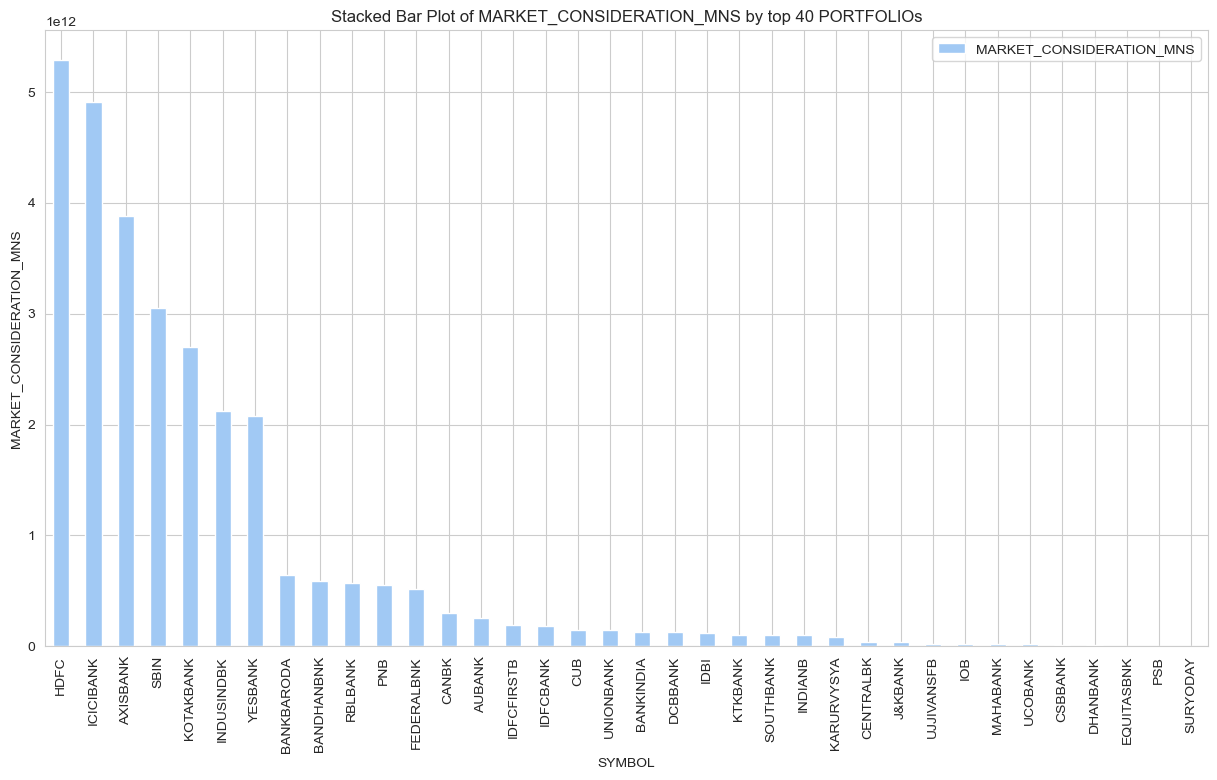

In [34]:
sns.set_style('whitegrid')  # Set the plot style
colors = sns.color_palette("pastel")  # Colors for Buy and Sell categories

# Plot the stacked bar chart
ax = grouped_data2.plot(kind='bar', color=colors, figsize=(15, 8))

# Set the plot labels and title
ax.set_xlabel('SYMBOL')
ax.set_ylabel('MARKET_CONSIDERATION_MNS')
ax.set_title('Stacked Bar Plot of MARKET_CONSIDERATION_MNS by top 40 PORTFOLIOs')


# Show the plot
plt.show()

## FEATURE SELECTION

In [35]:
cor_matrix = df.corr().abs()
print(cor_matrix.shape)

(27, 27)


C:\Users\Michelle.Gitau\AppData\Local\Temp\ipykernel_5780\3216181976.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df.corr().abs()


In [36]:
np.ones(cor_matrix.shape)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],


In [37]:
np.triu(np.ones(cor_matrix.shape), k=1).astype(bool)

array([[False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
  

In [38]:
upper_triangle = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

In [39]:
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] >= 0.95)]
to_drop.remove('VWAP')
to_drop

['OPEN',
 'HIGH',
 'LOW',
 'LAST',
 'CLOSE',
 'YEAR',
 'EXPONENTIAL_MOVING_AVERAGE_VOLUME',
 'EXPONENTIAL_MOVING_AVERAGE_%DELIVERBLE',
 'EXPONENTIAL_MOVING_AVERAGE_MARKET_CONSIDERATION_MN',
 'UNDELIVERABLE VOLUME',
 'SIMPLE_MOVING_AVERAGE_UNDELIVERABLE_VOLUME',
 'EXPONENTIAL_MOVING_AVERAGE_UNDELIVERABLE_VOLUME']

In [40]:
df = df.drop(to_drop,axis=1)
df = df.drop('PREV CLOSE', axis=1)
df

,DATE,SYMBOL,VOLUME,TURNOVER_IN_MILLIONS,TRADES,DELIVERABLE VOLUME,%DELIVERBLE,VWAP,DATE_AGE,MONTH,DAY,MARKET_CONSIDERATION_MNS,AVERAGE_TICKET,VOLUME_SIMPLE_MOVING_AVERAGE,SIMPLE_MOVING_AVERAGE_%DELIVERBLE,SIMPLE_MOVING_AVERAGE_MARKET_CONSIDERATION_MNS
0,2016-01-01,AXISBANK,3345654,150473265.00,37626,1549760,0.46,449.76,7,1,1,697020057.60,88.92,3345654.00,0.46,697020057.60
1,2016-01-01,BANKBARODA,2465469,38946877.00,14807,522606,0.21,157.97,7,1,1,82556069.82,166.51,2465469.00,0.21,82556069.82
2,2016-01-01,BANKINDIA,1729723,20132113.00,11172,408793,0.24,116.39,7,1,1,47579417.27,154.83,1729723.00,0.24,47579417.27
3,2016-01-01,CANBK,1549290,36696861.00,13562,354121,0.23,236.86,7,1,1,83877100.06,114.24,1549290.00,0.23,83877100.06
4,2016-01-01,CENTRALBK,165871,1185624.00,800,83549,0.50,71.48,7,1,1,5972082.52,207.34,165871.00,0.50,5972082.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-28,SURYODAY,294858,6710387.00,9755,179980,0.61,227.58,2,5,28,40959848.40,30.23,163246.67,0.68,24730547.04
41227,2021-05-28,UCOBANK,43581102,59615116.00,41450,15214003,0.35,13.68,2,5,28,208127561.04,1051.41,25094035.67,0.32,112814859.59
41228,2021-05-28,UJJIVANSFB,2104653,6331721.00,6812,1113577,0.53,30.08,2,5,28,33496396.16,308.96,2126244.33,0.47,29334377.30
41229,2021-05-28,UNIONBANK,28013917,96404494.00,35571,11127904,0.40,34.41,2,5,28,382911176.64,787.55,40658680.67,0.47,682116222.32


In [41]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the categorical column to numerical labels

df['SYMBOL'] = label_encoder.fit_transform(df['SYMBOL'])
df

,DATE,SYMBOL,VOLUME,TURNOVER_IN_MILLIONS,TRADES,DELIVERABLE VOLUME,%DELIVERBLE,VWAP,DATE_AGE,MONTH,DAY,MARKET_CONSIDERATION_MNS,AVERAGE_TICKET,VOLUME_SIMPLE_MOVING_AVERAGE,SIMPLE_MOVING_AVERAGE_%DELIVERBLE,SIMPLE_MOVING_AVERAGE_MARKET_CONSIDERATION_MNS
0,2016-01-01,1,3345654,150473265.00,37626,1549760,0.46,449.76,7,1,1,697020057.60,88.92,3345654.00,0.46,697020057.60
1,2016-01-01,3,2465469,38946877.00,14807,522606,0.21,157.97,7,1,1,82556069.82,166.51,2465469.00,0.21,82556069.82
2,2016-01-01,4,1729723,20132113.00,11172,408793,0.24,116.39,7,1,1,47579417.27,154.83,1729723.00,0.24,47579417.27
3,2016-01-01,5,1549290,36696861.00,13562,354121,0.23,236.86,7,1,1,83877100.06,114.24,1549290.00,0.23,83877100.06
4,2016-01-01,6,165871,1185624.00,800,83549,0.50,71.48,7,1,1,5972082.52,207.34,165871.00,0.50,5972082.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-28,31,294858,6710387.00,9755,179980,0.61,227.58,2,5,28,40959848.40,30.23,163246.67,0.68,24730547.04
41227,2021-05-28,32,43581102,59615116.00,41450,15214003,0.35,13.68,2,5,28,208127561.04,1051.41,25094035.67,0.32,112814859.59
41228,2021-05-28,33,2104653,6331721.00,6812,1113577,0.53,30.08,2,5,28,33496396.16,308.96,2126244.33,0.47,29334377.30
41229,2021-05-28,34,28013917,96404494.00,35571,11127904,0.40,34.41,2,5,28,382911176.64,787.55,40658680.67,0.47,682116222.32


In [42]:
split_percentage = 0.10  # 10% for testing, 90% for training
split_index = int(len(df) * (1 - split_percentage))

# Split the data into training and testing sets based on the calculated index
model_data = df.iloc[:split_index]
validation_data = df.iloc[split_index:]
model_data.shape , validation_data.shape

((37107, 16), (4124, 16))

In [43]:
model_data = model_data.drop('DATE',axis=1)
model_data

,SYMBOL,VOLUME,TURNOVER_IN_MILLIONS,TRADES,DELIVERABLE VOLUME,%DELIVERBLE,VWAP,DATE_AGE,MONTH,DAY,MARKET_CONSIDERATION_MNS,AVERAGE_TICKET,VOLUME_SIMPLE_MOVING_AVERAGE,SIMPLE_MOVING_AVERAGE_%DELIVERBLE,SIMPLE_MOVING_AVERAGE_MARKET_CONSIDERATION_MNS
0,1,3345654,150473265.00,37626,1549760,0.46,449.76,7,1,1,697020057.60,88.92,3345654.00,0.46,697020057.60
1,3,2465469,38946877.00,14807,522606,0.21,157.97,7,1,1,82556069.82,166.51,2465469.00,0.21,82556069.82
2,4,1729723,20132113.00,11172,408793,0.24,116.39,7,1,1,47579417.27,154.83,1729723.00,0.24,47579417.27
3,5,1549290,36696861.00,13562,354121,0.23,236.86,7,1,1,83877100.06,114.24,1549290.00,0.23,83877100.06
4,6,165871,1185624.00,800,83549,0.50,71.48,7,1,1,5972082.52,207.34,165871.00,0.50,5972082.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37102,27,871316,1214510.00,1690,590267,0.68,13.94,3,12,1,8228321.98,515.57,1554020.00,0.55,10840355.40
37103,28,12095583,272324904.00,66737,1363814,0.11,225.14,3,12,1,307049083.96,181.24,15194784.67,0.12,426744056.69
37104,29,37003272,912427741.00,186048,9607134,0.26,246.58,3,12,1,2368927101.72,198.89,51869097.67,0.26,3298604428.51
37105,30,25973940,20384386.00,73828,12343744,0.48,7.85,3,12,1,96898390.40,351.82,20556630.33,0.56,86002351.85


In [44]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit

# Specify the split ratio (e.g., 80% for training, 20% for testing)
train_ratio = 0.8

# Calculate the index at which to split the data
split_index = int(train_ratio * len(model_data))

# Split the data into training and testing sets
train_data = model_data.iloc[:split_index]
test_data = model_data.iloc[split_index:]

# Separate the features (X) and target (y)
X_train = train_data.drop(columns=['VWAP'])
y_train = train_data['VWAP']
X_test = test_data.drop(columns=['VWAP'])
y_test = test_data['VWAP']

# Display the shapes of the training and testing sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((29685, 14), (29685,), (7422, 14), (7422,))

In [45]:
categorical_features = ['SYMBOL']

In [46]:
import numpy as np
import pandas as pd
import shap
from catboost import CatBoostRegressor


clf = CatBoostRegressor(iterations=300,
                         eval_metric="R2")

clfmodel1 = clf.fit(X_train, y_train,
                   cat_features=categorical_features,
                   verbose=False, 
                   eval_set=(X_test, y_test),
                plot=True,
                  early_stopping_rounds=100,
                  )

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [47]:
explainer = shap.Explainer(clfmodel1)

In [48]:
shap_values = explainer.shap_values(X_test)

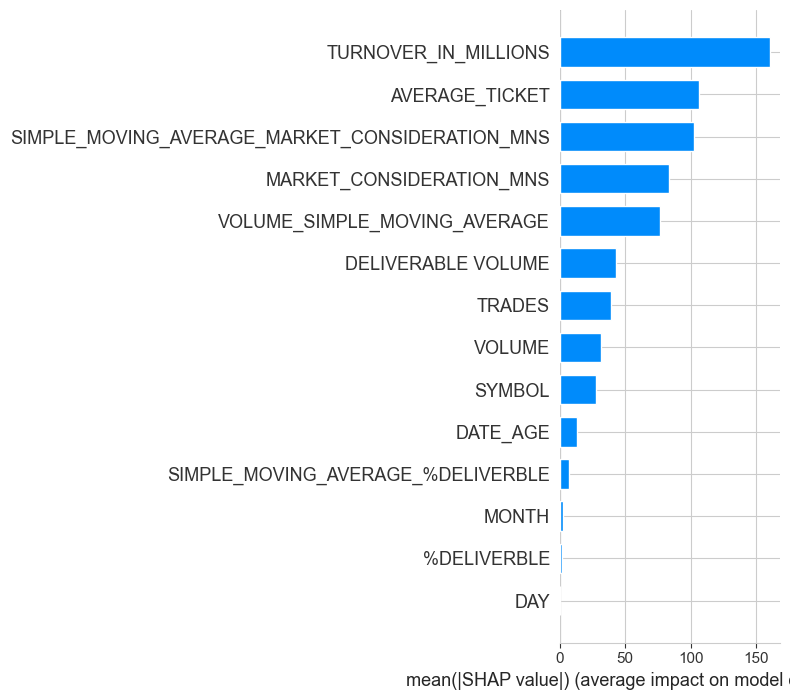

In [49]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [50]:

from boruta import BorutaPy
from xgboost import XGBRegressor

X = X_train
y = y_train

xgb_model = XGBRegressor(verbosity=0)

bp = BorutaPy(estimator=xgb_model, n_estimators='auto', max_iter=100)
bp.fit(np.array(X), np.array(y))     #label encode features for boruta/vif


bp_cols = X.columns
best_feats = bp_cols[bp.support_].to_list()
better_feats = bp_cols[bp.support_weak_].to_list()

boruta_data = pd.DataFrame({
    "features": bp_cols, 
    "rank": bp.ranking_,     # 1 is the best
    "accept": bp.support_,
    "maybe": bp.support_weak_
})


print(len(boruta_data["features"]))
nboruta_cols = [ col for col, acc in zip(boruta_data["features"], boruta_data["accept"]) if acc == True]
print(len(nboruta_cols), nboruta_cols)

boruta_data.head(15)

14
13 ['SYMBOL', 'VOLUME', 'TURNOVER_IN_MILLIONS', 'TRADES', 'DELIVERABLE VOLUME', '%DELIVERBLE', 'DATE_AGE', 'MONTH', 'MARKET_CONSIDERATION_MNS', 'AVERAGE_TICKET', 'VOLUME_SIMPLE_MOVING_AVERAGE', 'SIMPLE_MOVING_AVERAGE_%DELIVERBLE', 'SIMPLE_MOVING_AVERAGE_MARKET_CONSIDERATION_MNS']


,features,rank,accept,maybe
0,SYMBOL,1,True,False
1,VOLUME,1,True,False
2,TURNOVER_IN_MILLIONS,1,True,False
3,TRADES,1,True,False
4,DELIVERABLE VOLUME,1,True,False
5,%DELIVERBLE,1,True,False
6,DATE_AGE,1,True,False
7,MONTH,1,True,False
8,DAY,2,False,False
9,MARKET_CONSIDERATION_MNS,1,True,False


In [51]:
##VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

sel_cols = ['SYMBOL', 'TURNOVER_IN_MILLIONS', 'TRADES', 'DELIVERABLE VOLUME', '%DELIVERBLE', 'DATE_AGE', 'MONTH',
             'AVERAGE_TICKET', 'VOLUME_SIMPLE_MOVING_AVERAGE', ]
def calc_vif(df):
    data = pd.DataFrame()
    data["variables"] = df.columns
    data["VIF"] = [ variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return data

#vif = calc_vif(X_train_boruta)
vif = calc_vif(X[sel_cols])

nvif_cols = vif[vif["VIF"] < 10].variables.values
extra_vif_cols = [col for col in nvif_cols if col not in nboruta_cols]
vif

,variables,VIF
0,SYMBOL,4.13
1,TURNOVER_IN_MILLIONS,8.18
2,TRADES,10.52
3,DELIVERABLE VOLUME,4.06
4,%DELIVERBLE,5.23
5,DATE_AGE,9.81
6,MONTH,4.24
7,AVERAGE_TICKET,2.38
8,VOLUME_SIMPLE_MOVING_AVERAGE,3.46


In [52]:
boruta_features = vif.variables.values.tolist()
boruta_features

['SYMBOL',
 'TURNOVER_IN_MILLIONS',
 'TRADES',
 'DELIVERABLE VOLUME',
 '%DELIVERBLE',
 'DATE_AGE',
 'MONTH',
 'AVERAGE_TICKET',
 'VOLUME_SIMPLE_MOVING_AVERAGE']

In [53]:
# df.columns

In [54]:
# useful_cols_catboost = ['VOLUME', 'TURNOVER_IN_MILLIONS', 'TRADES',
#        'DELIVERABLE VOLUME', '%DELIVERBLE', 
#        'YEAR', 'MARKET_CONSIDERATION_MNS', 'AVERAGE_TICKET', 'VWAP_Lag_1',
#        'VWAP_Lag_2', 'VWAP_Lag_3', 'SIMPLE_MOVING_AVERAGE',
#        'EXPONENTIAL_MOVING_AVERAGE']

In [55]:
# common_elements = set(useful_cols_catboost).intersection(boruta_features)
# common_elements

In [56]:
top_features = ['SYMBOL', 'TURNOVER_IN_MILLIONS', 'TRADES', 'DELIVERABLE VOLUME', '%DELIVERBLE', 'DATE_AGE',
 'MONTH', 'AVERAGE_TICKET', 'VOLUME_SIMPLE_MOVING_AVERAGE']
top_features

['SYMBOL',
 'TURNOVER_IN_MILLIONS',
 'TRADES',
 'DELIVERABLE VOLUME',
 '%DELIVERBLE',
 'DATE_AGE',
 'MONTH',
 'AVERAGE_TICKET',
 'VOLUME_SIMPLE_MOVING_AVERAGE']

In [57]:
X_train = X_train[top_features]
X_test = X_test[top_features]

In [58]:
# from sklearn.model_selection import GridSearchCV


# model = CatBoostRegressor()
# param_grid = {
#     'iterations': [100, 200, 300,400,500,600],
#     'learning_rate': [0.01,0.05, 0.1, 0.2],
#     'depth': [3,4, 6, 8],
#     'l2_leaf_reg': [1, 3, 5],
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=0)

# # Fit GridSearchCV to the training data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:")
# print(best_params)

# # Get the best model with the tuned hyperparameters
# best_model = grid_search.best_estimator_

# # Evaluate the best model on the test set
# mse = np.mean((best_model.predict(X_test) - y_test) ** 2)
# print(f"Mean Squared Error on Test Set: {mse}")


#depth= 4, iterations = 600,  l2_leaf_reg = 3,   learning_rate= 0.2,

In [59]:
from catboost import CatBoostRegressor



clf = CatBoostRegressor(depth= 4,
                         iterations = 600,       # Max 550-600
                         l2_leaf_reg = 3, 
                         learning_rate= 0.2,     # 0.1 - 0.0009
                         # subsample=0.7,        # 0.1 - 0.9
                         loss_function='RMSE',
                         random_seed=42,
#                          auto_class_weights="SqrtBalanced",
                         eval_metric="R2"
                        )

clfmodel = clf.fit(X_train[top_features], y_train,
#                    cat_features=X_train[top_features].select_dtypes(include='category').columns.tolist(),
                   verbose=False, 
                   eval_set=(X_test[top_features], y_test),
                   plot=True,
                   early_stopping_rounds=50,
                  )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [60]:
y_pred = clfmodel.predict(X_test)

In [61]:
y_pred_train = clfmodel.predict(X_train)
mean_squared_error(y_train,y_pred_train)

1220.4052323266417

In [62]:
mean_squared_error(y_test, y_pred)

4842.179206037977

In [63]:
r2_score(y_test,y_pred), r2_score(y_train,y_pred_train)

(0.9733385417477466, 0.9937954099916891)

In [64]:
mean_absolute_error(y_train,y_pred_train)

20.685791597020145

In [65]:
mean_absolute_error(y_test, y_pred)

34.3183204889469

## VALIDATION OF MODEL ACCURACY

In [66]:
validation_data

,DATE,SYMBOL,VOLUME,TURNOVER_IN_MILLIONS,TRADES,DELIVERABLE VOLUME,%DELIVERBLE,VWAP,DATE_AGE,MONTH,DAY,MARKET_CONSIDERATION_MNS,AVERAGE_TICKET,VOLUME_SIMPLE_MOVING_AVERAGE,SIMPLE_MOVING_AVERAGE_%DELIVERBLE,SIMPLE_MOVING_AVERAGE_MARKET_CONSIDERATION_MNS
37107,2020-12-01,33,1066379,4049496.00,4114,612844,0.57,37.97,3,12,1,23269686.68,259.21,1256386.67,0.57,27381610.21
37108,2020-12-01,34,10355127,29858662.00,16143,3275773,0.32,28.83,3,12,1,94440535.59,641.46,8969447.00,0.30,76606355.64
37109,2020-12-01,35,384256021,590808525.00,90998,181492123,0.47,15.38,3,12,1,2791348851.74,4222.69,535241180.00,0.52,4970966087.53
37110,2020-12-02,0,463500,40804319.00,23805,159707,0.34,880.35,3,12,2,140598057.45,19.47,641172.33,0.46,262672048.45
37111,2020-12-02,1,19070722,1157335432.00,174255,5911134,0.31,606.87,3,12,2,3587289890.58,109.44,23425831.67,0.39,5702931142.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-28,31,294858,6710387.00,9755,179980,0.61,227.58,2,5,28,40959848.40,30.23,163246.67,0.68,24730547.04
41227,2021-05-28,32,43581102,59615116.00,41450,15214003,0.35,13.68,2,5,28,208127561.04,1051.41,25094035.67,0.32,112814859.59
41228,2021-05-28,33,2104653,6331721.00,6812,1113577,0.53,30.08,2,5,28,33496396.16,308.96,2126244.33,0.47,29334377.30
41229,2021-05-28,34,28013917,96404494.00,35571,11127904,0.40,34.41,2,5,28,382911176.64,787.55,40658680.67,0.47,682116222.32


In [67]:
X = validation_data[top_features]
X

,SYMBOL,TURNOVER_IN_MILLIONS,TRADES,DELIVERABLE VOLUME,%DELIVERBLE,DATE_AGE,MONTH,AVERAGE_TICKET,VOLUME_SIMPLE_MOVING_AVERAGE
37107,33,4049496.00,4114,612844,0.57,3,12,259.21,1256386.67
37108,34,29858662.00,16143,3275773,0.32,3,12,641.46,8969447.00
37109,35,590808525.00,90998,181492123,0.47,3,12,4222.69,535241180.00
37110,0,40804319.00,23805,159707,0.34,3,12,19.47,641172.33
37111,1,1157335432.00,174255,5911134,0.31,3,12,109.44,23425831.67
...,...,...,...,...,...,...,...,...,...
41226,31,6710387.00,9755,179980,0.61,2,5,30.23,163246.67
41227,32,59615116.00,41450,15214003,0.35,2,5,1051.41,25094035.67
41228,33,6331721.00,6812,1113577,0.53,2,5,308.96,2126244.33
41229,34,96404494.00,35571,11127904,0.40,2,5,787.55,40658680.67


In [68]:
predictions = clfmodel.predict(X)
predictions

array([ 40.68453222,  38.43107891, 179.93127834, ...,  26.50068584,
        36.68489842, -53.83268279])

In [69]:
validation_data['PREDICTIONS'] = predictions
validation_data


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,DATE,SYMBOL,VOLUME,TURNOVER_IN_MILLIONS,TRADES,DELIVERABLE VOLUME,%DELIVERBLE,VWAP,DATE_AGE,MONTH,DAY,MARKET_CONSIDERATION_MNS,AVERAGE_TICKET,VOLUME_SIMPLE_MOVING_AVERAGE,SIMPLE_MOVING_AVERAGE_%DELIVERBLE,SIMPLE_MOVING_AVERAGE_MARKET_CONSIDERATION_MNS,PREDICTIONS
37107,2020-12-01,33,1066379,4049496.00,4114,612844,0.57,37.97,3,12,1,23269686.68,259.21,1256386.67,0.57,27381610.21,40.68
37108,2020-12-01,34,10355127,29858662.00,16143,3275773,0.32,28.83,3,12,1,94440535.59,641.46,8969447.00,0.30,76606355.64,38.43
37109,2020-12-01,35,384256021,590808525.00,90998,181492123,0.47,15.38,3,12,1,2791348851.74,4222.69,535241180.00,0.52,4970966087.53,179.93
37110,2020-12-02,0,463500,40804319.00,23805,159707,0.34,880.35,3,12,2,140598057.45,19.47,641172.33,0.46,262672048.45,834.39
37111,2020-12-02,1,19070722,1157335432.00,174255,5911134,0.31,606.87,3,12,2,3587289890.58,109.44,23425831.67,0.39,5702931142.79,562.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-28,31,294858,6710387.00,9755,179980,0.61,227.58,2,5,28,40959848.40,30.23,163246.67,0.68,24730547.04,381.31
41227,2021-05-28,32,43581102,59615116.00,41450,15214003,0.35,13.68,2,5,28,208127561.04,1051.41,25094035.67,0.32,112814859.59,-20.84
41228,2021-05-28,33,2104653,6331721.00,6812,1113577,0.53,30.08,2,5,28,33496396.16,308.96,2126244.33,0.47,29334377.30,26.50
41229,2021-05-28,34,28013917,96404494.00,35571,11127904,0.40,34.41,2,5,28,382911176.64,787.55,40658680.67,0.47,682116222.32,36.68


In [70]:
compare = validation_data[['DATE','SYMBOL','MONTH','DAY','VWAP','PREDICTIONS']]
compare

,DATE,SYMBOL,MONTH,DAY,VWAP,PREDICTIONS
37107,2020-12-01,33,12,1,37.97,40.68
37108,2020-12-01,34,12,1,28.83,38.43
37109,2020-12-01,35,12,1,15.38,179.93
37110,2020-12-02,0,12,2,880.35,834.39
37111,2020-12-02,1,12,2,606.87,562.86
...,...,...,...,...,...,...
41226,2021-05-28,31,5,28,227.58,381.31
41227,2021-05-28,32,5,28,13.68,-20.84
41228,2021-05-28,33,5,28,30.08,26.50
41229,2021-05-28,34,5,28,34.41,36.68


In [71]:
compare['DEVIATION'] = compare.PREDICTIONS - compare.VWAP
compare


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,DATE,SYMBOL,MONTH,DAY,VWAP,PREDICTIONS,DEVIATION
37107,2020-12-01,33,12,1,37.97,40.68,2.71
37108,2020-12-01,34,12,1,28.83,38.43,9.60
37109,2020-12-01,35,12,1,15.38,179.93,164.55
37110,2020-12-02,0,12,2,880.35,834.39,-45.96
37111,2020-12-02,1,12,2,606.87,562.86,-44.01
...,...,...,...,...,...,...,...
41226,2021-05-28,31,5,28,227.58,381.31,153.73
41227,2021-05-28,32,5,28,13.68,-20.84,-34.52
41228,2021-05-28,33,5,28,30.08,26.50,-3.58
41229,2021-05-28,34,5,28,34.41,36.68,2.27


In [72]:
compare.DEVIATION.describe()

count    4124.00
mean      -13.61
std        79.12
min     -1048.61
25%       -15.06
50%         0.13
75%        14.97
max       317.26
Name: DEVIATION, dtype: float64

In [73]:
compare['SYMBOL'] = label_encoder.inverse_transform(compare.SYMBOL)
compare


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,DATE,SYMBOL,MONTH,DAY,VWAP,PREDICTIONS,DEVIATION
37107,2020-12-01,UJJIVANSFB,12,1,37.97,40.68,2.71
37108,2020-12-01,UNIONBANK,12,1,28.83,38.43,9.60
37109,2020-12-01,YESBANK,12,1,15.38,179.93,164.55
37110,2020-12-02,AUBANK,12,2,880.35,834.39,-45.96
37111,2020-12-02,AXISBANK,12,2,606.87,562.86,-44.01
...,...,...,...,...,...,...,...
41226,2021-05-28,SURYODAY,5,28,227.58,381.31,153.73
41227,2021-05-28,UCOBANK,5,28,13.68,-20.84,-34.52
41228,2021-05-28,UJJIVANSFB,5,28,30.08,26.50,-3.58
41229,2021-05-28,UNIONBANK,5,28,34.41,36.68,2.27
